<a href="https://colab.research.google.com/github/YMGYM/python_deeplearning_pytorch/blob/main/Pytorch_part4~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1 Convolutional Neural Network(CNN)

## CNN 기초

### Convolution Layer

이미지를 스캔하면서 이미지 Region Feature를 추출한다.

### Stride
Receptive Field 가 피쳐를 뽑을 때 이동하는 칸 수

### Padding
이미지 테두리 부분에도 Convolution을 적용하기 위해 사용

### Weight Sharing
슬라이드할 때마다 Window 의 같은 가중치를 공유..

### pooling
학습 속도 향상.
Layer 가중치를 반으로 줄여 줌

### Fully Connected Layer
Flatten 후 학습


# 4-2 CNN과 MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.CIFAR10(root='../data/CIFAR', train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='../data/CIFAR', train=False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= BATCH_SIZE, shuffle=False)


Extracting ../data/CIFAR/cifar-10-python.tar.gz to ../data/CIFAR


In [ ]:
for (X_train, y_train) in train_loader:
  print(f"X_train : {X_train.size()} type: {X_train.type()}")
  print(f"y_train : {y_train.size()} type: {y_train.type()}")
  break

X_train : torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train : torch.Size([32]) type: torch.LongTensor


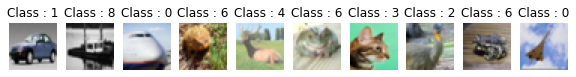

In [ ]:
pltsize = 1
plt.figure(figsize =(10*pltsize, pltsize))

for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1,2,0)))
  plt.title('Class : ' + str(y_train[i].item()))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 32 * 32 * 3)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
model

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)

    optimizer.zero_grad()
    output = model(image)
    
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(f" Train Epoch : {Epoch}[{batch_idx * len(image)} / {len(train_loader.dataset)}] {100. * batch_idx / len(train_loader):0.6f}%\t Train Loss : {loss.item()}") 

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      label = label.to(DEVICE)
      image = image.to(DEVICE)

      output = model(image)

      
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)

  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy



In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 1.890013575553894
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.6172072887420654
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.3881436586380005
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.449142575263977
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.3396453857421875
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.4972102642059326
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.5571694374084473
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.5386818647384644

 Test. EPOCH: 1	 Test Loss : 0.0502	 Test Accuracy: 42.5300
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.602581262588501
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.348524808883667
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.4899369478225708
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.6458021402359009
 Train Epoch : 2[25600 / 50000] 51.183621%	

In [ ]:
# CNN 모델 설계
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(
        in_channels = 3, out_channels = 8,
        kernel_size = 3,
        padding = 1
    )
    self.conv2 = nn.Conv2d(
        in_channels = 8, out_channels = 16,
        kernel_size = 3,
        padding = 1
    )
    self.pool = nn.MaxPool2d(
        kernel_size =2, stride = 2
    )

    self.fc1 = nn.Linear(8 * 8 * 16, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)
  
  def forward(self, x):
    # x = (32, 32, 3)
    x = self.conv1(x) # x = (32, 32, 3) ## len(x) - kernel_size + 1
    x = F.relu(x)
    x = self.pool(x) # x = (16, 16, 3)
    x = self.conv2(x) # x = (16, 16, 3) 
    x = F.relu(x)
    x = self.pool(x) # x = (8, 8, 3)

    x = x.view(-1, 8* 8 * 16)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x)

    return x

In [ ]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 2.316953420639038
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.9072537422180176
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.8389112949371338
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.7483105659484863
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.8058133125305176
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.4402661323547363
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.7851563692092896
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.2397018671035767

 Test. EPOCH: 1	 Test Loss : 0.0479	 Test Accuracy: 43.4600
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.6670119762420654
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.3766518831253052
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.3970381021499634
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.3448647260665894
 Train Epoch : 2[25600 / 50000] 51.18362

# 4-3 Data Augmentation

이미지에 변형을 가하면 데이터를 증가시킬 수 있다.

In [ ]:
# Data augmentation 해서 이미지를 불러 옴
train_dataset = datasets.CIFAR10(root = '../data/CIFAR', train=True, download=True, 
                                 transform=transforms.Compose([
                                                               transforms.RandomHorizontalFlip(), # 좌우반전 (50% 확률)
                                                               transforms.ToTensor(), # 정규화(0~1) 및 텐서화
                                                               transforms.Normalize((0.5, 0.5,0.5),(0.5, 0.5,0.5)) # 데이터 정규화(평균과 표준편차 조정), 평균과 표준편차 RGB에 각각 0.5 씩 적용
                                                               ]))
test_dataset = datasets.CIFAR10(root = '../data/CIFAR', train=False, transform=transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor(), transforms.Normalize((0.5, 0.5,0.5),(0.5, 0.5,0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [ ]:
# Augmentation 된 데이터로 학습
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

NameError: ignored

# 4-4 CNN Architecture

### ImageNet
이미지 분류 모델을 측정하기 위한 데이터로 가장 많이 사용되는 데이터

### Network Architecture
네트워크의 성능을 높이기 위한 구조, 깊게 쌓으면서 과적합을 방지하고자 하는 연구.

### LeNet
최초의 CNN모델.
(1990년대에 나온 모델이므로 비교적 단순한 구조를 가지고 있음)

### Alexnet
2012 ILSVRC 대회 우승 모델. 구조는 크게 다르지 않지만 Dropoout, DataAugmentation등을 적용했다.

### VGG
2014 ILSVRC 대회에서 2등을 차지한 모델.

3*3 합성곱 층을 깊게 중첩하는 것이 특징

### GoogLeNet

2014 ILSVRC 대회에서 1등한 모델.

Inception 구조를 처음 적용하고 Gloval Average Pooling 을 처음 적용했음.

### ResNet

2015 ILSVRC 대회에서 1등.
이미지 분류의 기본 모델로 사용하고 있음.

Residual Block 이란 개념 도입. (이전 층의 feature Map을 다음 층의 feature map 에 더해줌) -> 기울기 소실 제거

### DenseNet

ResNet의 확장형 버전. 모든 층에 대해 Skip connection 을 연결한다.

In [ ]:
import torch
import torch.nn as nn
import torch.functional as F

In [ ]:
class BasicBlock(nn.Module):
  def __init__(self, in_planes, planes, stride = 1):
    super(BasicBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_planes, planes,
                           kernel_size = 3,
                           stride = stride,
                           padding = 1,
                           bias = False)
    self.bn1 = nn.BatchNorm2d(planes)
    self.conv2 = nn.Conv2d(planes, planes,
                           kernel_size = 3,
                           stride = 1,
                           padding = 1,
                           bias = False)
    self.bn2 = nn.BatchNorm2d(planes)

    self.shortcut = nn.Sequential()
    if stride != 1 or in_planes != planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes, planes,
                    kernel_size = 1,
                    stride = stride,
                    bias = False),

          nn.BathcNorm2d(planes)
      )

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))
    out += self.sortcut(x)
    out = F.relu(out)
    
    return out

In [ ]:
class ResNet(nn.Module):
  def __init__(self, num_classes = 10):
    super(ResNet, self).__init__()
    self.in_plane = 16

    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(16)
    self.layer1 = self._make_layer(16, 2, stride=1)
    self.layer2 = self._make_layer(32, 2, stride = 2)
    self.layer3 = self._make_layer(64, 2, stride = 2)
    self.linear = nn.Linear(64, num_classes)


  def _make_layer(self, planes, num_blocks, stride):
    stride = [stride] + [1] * (num_blocks - 1)
    layers = []

    for stride in stride:
      layers.append(BasicBlock(self.in_planes, planes, stride))
      self.in_planes = planes
    return nn.Sequential(*layers)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = F.avg_pool2d(out, 8)
    out = out.view(out.size(0), -1)
    out = self.linear(out)

    return out

## Pytorch 에서 제공하고 있는 레퍼런스 모델을 사용하여 전이학습



In [ ]:
import torchvision.models as models
import torch
import torch.nn as nn
import torch.functional as F
import numpy as np

In [ ]:
model = models.resnet34(pretrained = False) # 모델의 구조만 가지고 온다.
num_ftrs = model.fc.in_features # 모델의 input 값을 가지고 온다.
model.fc = nn.Linear(num_ftrs, 10) # 
model = model.cuda()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
for Epoch in range(1, EPOCHS+1):
  train(model, train_loader, optimizer, 200)
  evaluate(model, test_loader)

 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 2.6761622428894043
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.9567532539367676
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.5143628120422363
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.2545279264450073
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.7000446319580078
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.0980358123779297
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.295883059501648
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.2032885551452637
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.48259699344635
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.4761439561843872
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.2444225549697876
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.1360934972763062
 Train Epoch : 2[25600 / 50000] 51.183621%	 Train Loss : 1.3263530731201172
 Train Epoch : 2[32000 / 50

# 4-5 Transfer learning

미리 학습된 모델을 가지고 재학습 시키는 과정.

Pretrained model의 Fully Connected Layer이전의 Weight는 학습시키지 않는다. (Freezing)

In [ ]:
# 필요한 모듈 import
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms, datasets

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"{DEVICE} Use.")

cuda Use.


In [ ]:
# 하이퍼파라미터 설정
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
# 데이터셋 불러오기
data_transforms = {
    'train' : transforms.Compose([
          transforms.RandomResizedCrop(224), # 이미지 일부를 랜덤으로 선택해 사이즈 변경
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ]),
    'val' : transforms.Compose([
          transforms.CenterCrop(224),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ])
}

image_datasets = {x: datasets.ImageFolder("/content/drive/MyDrive/Datasets/hymenoptera_data/hymenoptera_data", data_transforms[x]) for x in ['train', 'val']}
# 반복문을 돌려서 train, val 폴더에 접근

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size = BATCH_SIZE,
                                              num_workers=0,
                                              shuffle=True) for x in ['train', 'val']}

In [ ]:
# 데이터 확인하기
for (X_train, y_train) in dataloaders['train']:
  print('X_train:', X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break

X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

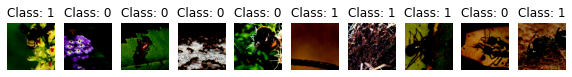

In [ ]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1, 2, 0))) # 3, 224, 224 를 224,224, 3으로 변환
  plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
# 학습 함수
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()

    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(f"Train Epoch: {Epoch} [{batch_idx * len(image)} / {len(train_loader.dataset)}, {100. * batch_idx / len(train_loader):.5f}% ] Loss: {loss.item():.5f}")

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)

      output = model(image)

      test_loss += criterion(output, label).item()

      prediction = output.max(1, keepdim = True)[1]

      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)

  print(f"Test Epoch: {Epoch} Accuracy: {test_accuracy:.5f} Loss: {test_loss:.5f}")
  return test_loss, test_accuracy

In [ ]:
# 미리 학습되지 않은 Resnet
import torchvision.models as models

model = models.resnet18(pretrained=False)

In [ ]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(DEVICE)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, dataloaders['train'], optimizer, log_interval=5)
  evaluate(model, dataloaders["val"])

Train Epoch: 1 [0 / 397, 0.0% ] Loss: 0.816821813583374
Train Epoch: 1 [160 / 397, 38.46153846153846% ] Loss: 0.7018833160400391
Train Epoch: 1 [320 / 397, 76.92307692307692% ] Loss: 0.6799526810646057
Test Epoch: 1 Accuracy: 38.79093198992443 Loss: 0.02776405853348355
Train Epoch: 2 [0 / 397, 0.0% ] Loss: 0.667687714099884
Train Epoch: 2 [160 / 397, 38.46153846153846% ] Loss: 0.6363753080368042
Train Epoch: 2 [320 / 397, 76.92307692307692% ] Loss: 0.6933073997497559
Test Epoch: 2 Accuracy: 61.20906801007557 Loss: 0.021742423025126422
Train Epoch: 3 [0 / 397, 0.0% ] Loss: 0.6162024140357971
Train Epoch: 3 [160 / 397, 38.46153846153846% ] Loss: 0.6629213690757751
Train Epoch: 3 [320 / 397, 76.92307692307692% ] Loss: 0.6499609351158142
Test Epoch: 3 Accuracy: 61.46095717884131 Loss: 0.021470930774506153
Train Epoch: 4 [0 / 397, 0.0% ] Loss: 0.6811257600784302
Train Epoch: 4 [160 / 397, 38.46153846153846% ] Loss: 0.6152893304824829
Train Epoch: 4 [320 / 397, 76.92307692307692% ] Loss: 0.6

이미 학습된 데이터로 트레이닝

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(DEVICE)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, dataloaders['train'], optimizer, log_interval=5)
  evaluate(model, dataloaders["val"])

Train Epoch: 1 [0 / 397, 0.00000% ] Loss: 0.62168
Train Epoch: 1 [160 / 397, 38.46154% ] Loss: 0.65241
Train Epoch: 1 [320 / 397, 76.92308% ] Loss: 0.73272
Test Epoch: 1 Accuracy: 62.72040 Loss: 0.01998
Train Epoch: 2 [0 / 397, 0.00000% ] Loss: 0.67335
Train Epoch: 2 [160 / 397, 38.46154% ] Loss: 0.52770
Train Epoch: 2 [320 / 397, 76.92308% ] Loss: 0.59696
Test Epoch: 2 Accuracy: 79.59698 Loss: 0.01604
Train Epoch: 3 [0 / 397, 0.00000% ] Loss: 0.41963
Train Epoch: 3 [160 / 397, 38.46154% ] Loss: 0.61764
Train Epoch: 3 [320 / 397, 76.92308% ] Loss: 0.53508
Test Epoch: 3 Accuracy: 76.32242 Loss: 0.01487
Train Epoch: 4 [0 / 397, 0.00000% ] Loss: 0.37416
Train Epoch: 4 [160 / 397, 38.46154% ] Loss: 0.42998
Train Epoch: 4 [320 / 397, 76.92308% ] Loss: 0.29003
Test Epoch: 4 Accuracy: 86.90176 Loss: 0.01078
Train Epoch: 5 [0 / 397, 0.00000% ] Loss: 0.38609
Train Epoch: 5 [160 / 397, 38.46154% ] Loss: 0.39034
Train Epoch: 5 [320 / 397, 76.92308% ] Loss: 0.29021
Test Epoch: 5 Accuracy: 93.19899

# 5 - 1 Data & Task: 어떤 데이터가 있을까?

Text 데이터를 분석하고 모델링하는 분야를 '자연어 처리'라고 한다.
- NLU: Text -> Meaning
- NLG: Meaning -> Text
- NLP: NLU + NLG

자연어처리의 NLP의 작은 Task 의 요약은 다음과 같다.
### 감정분석
텍스트 데이터가 나타내는 특정 감정을 분류한다. 긍정 부정을 분류 or 긍정까지 n점 척도.
### 요약
텍스트에서 중유한 부분을 찾아내는 Extractive Summarization과 완전히 새로운 문장을 만들어내는 Abstractive Summarization이 있다.

### 기계 번역
이미 많은 서비스에서 사용중. 주로 번역하고자 하는 문장을 Source Sentence, 정답 문장을 Target Sentence라 표현한다.

### 질문 응답
문서를 이해하고 문서속 정보에 대해 질문을 했을 때 답을 이끌어내는 Task. 

### 기타 분야
- POS(Part of Speech) 태깅 분야
- 챗봇
- 각 단어의 중의적 표현을 구분(Word Sense Disambiguation)

In [ ]:
# pytorch 를 이용해 데이터 불러오기
from torchtext.legacy import data
from torchtext.legacy import datasets

# 데이터의 Field를 선택하고 가져와야한다.
TEXT = data.Field(lower=True, batch_first = True)  # batch_first 는 Batch_size를 데이터셋의 shape[0]으로 가져온다.
LABEL = data.Field(sequential=False)

train, test = datasets.IMDB.splits(TEXT, LABEL)

aclImdb_v1.tar.gz:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:04<00:00, 20.3MB/s]


In [ ]:
train

# 5-2 문자를 숫자로 표현하는 방법

문장을 의미 있는 부분을 숫자로 바꿔 표현한다.
가장 기본적인 방법은 띄어쓰기로 분할하는 것

In [ ]:
s1 = "나는 책상 위에 사과를 먹었다."
s2 = "알고 보니 그 사과는 Jason 것이었다."
s3 = "그래서 Jason에게 사과를 했다."

In [ ]:
print(s1.split())
print(s2.split())
print(s3.split())

['나는', '책상', '위에', '사과를', '먹었다.']
['알고', '보니', '그', '사과는', 'Jason', '것이었다.']
['그래서', 'Jason에게', '사과를', '했다.']


이처럼 문장을 의미 있는 부분으로 나누는 것을 Tokenization이라고 한다.

In [ ]:
token2idx = {}
index = 0

for sentence in [s1, s2, s3]:
  tokens = sentence.split()
  for token in tokens:
    if token2idx.get(token) == None:
      token2idx[token] = index
      index += 1

print(token2idx)

{'나는': 0, '책상': 1, '위에': 2, '사과를': 3, '먹었다.': 4, '알고': 5, '보니': 6, '그': 7, '사과는': 8, 'Jason': 9, '것이었다.': 10, '그래서': 11, 'Jason에게': 12, '했다.': 13}


token2idx를 vocabulary라고 한다.

토큰을 숫자로 바꾸면 다음과 같다.

In [ ]:
def indexed_sentence(sentence):
  return [token2idx[token] for token in sentence]

s1_i = indexed_sentence(s1.split())
print(s1_i)
s2_i = indexed_sentence(s2.split())
print(s2_i)
s3_i = indexed_sentence(s3.split())
print(s3_i)

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9, 10]
[11, 12, 3, 13]


## Corpus & out-of-Vocabulary(OOV)

`token2idx` 에는 `'배를'` 이라는 단어가 존재하지 않아서 오류가 발생한다.
이에 대한 예외처리가 필요하다.

In [ ]:
s4 = "나는 책상 위에 배를 먹었다."

indexed_sentence(s4.split()) # KeyError '배를' => 없는 코드이므로 동작하지 않는다.

KeyError: ignored

In [ ]:
# 기존 사전에 <unk>추가
token2idx = {t: i + 1 for t,i in token2idx.items()}
token2idx['<unk>'] = 0

In [ ]:
def indexed_sentence_unk(sentence):
  return [token2idx.get(token, token2idx['<unk>']) for token in sentence]

indexed_sentence_unk(s4.split())

[1, 2, 3, 0, 5]

## Byte Pair Encoding(BPE)

띄어쓰기로 단어를 나누면 비효율적으로 나눠지는 문제가 생간다. 

### Charater Based tokenization
글자 단위로 토크나이징을 하면 11172 개의 글자 조합이 가능하다.

In [ ]:
# Unicode 로 분석 (영어)
print([chr(k) for k in range(65, 91)]) # 영어 대문자
print([chr(k) for k in range(97, 123)]) # 영어 소문자

# 특수 문자 및 숫자 unicode
print([chr(k) for k in range(32, 48)])
print([chr(k) for k in range(91, 97)])
print([chr(k) for k in range(123, 127)])
print([chr(k) for k in range(48, 58)])

# 한국어 unicode
print([chr(k) for k in range(int('0xAC00', 16), int('0xD7A3', 16) + 1)]) # 모든 완성형 한글
print([chr(k) for k in range(int('0x3131', 16), int('0x3163', 16) + 1)]) # 자음 모음

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/']
['[', '\\', ']', '^', '_', '`']
['{', '|', '}', '~']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['가', '각', '갂', '갃', '간', '갅', '갆', '갇', '갈', '갉', '갊', '갋', '갌', '갍', '갎', '갏', '감', '갑', '값', '갓', '갔', '강', '갖', '갗', '갘', '같', '갚', '갛', '개', '객', '갞', '갟', '갠', '갡', '갢', '갣', '갤', '갥', '갦', '갧', '갨', '갩', '갪', '갫', '갬', '갭', '갮', '갯', '갰', '갱', '갲', '갳', '갴', '갵', '갶', '갷', '갸', '갹', '갺', '갻', '갼', '갽', '갾', '갿', '걀', '걁', '걂', '걃', '걄', '걅', '걆', '걇', '걈', '걉', '걊', '걋', '걌', '걍', '걎', '걏', '걐', '걑', '걒', '걓', '걔', '걕', '걖', '걗', '걘', '걙', '걚', '걛', '걜', '걝', '걞', '걟', '걠', '걡', '걢', '걣', '걤', '걥', '걦', '걧', '걨', '걩', '걪', '걫', '걬', '걭', '걮

In [ ]:
# Charater Token Vocabulary 만들기
idx2char = {0: '<pad>', 1:'<unk>'}

srt_idx = len(idx2char)

for x in range(32, 127):
  idx2char.update({srt_idx: chr(x)})
  srt_idx += 1

# 한글 추가
for x in range(int('0x3131', 16), int('0x3163', 16) + 1):
  idx2char.update({srt_idx: chr(x)})
  srt_idx += 1


for x in range(int('0xAC00', 16), int('0xD7A3', 16) + 1):
  idx2char.update({srt_idx: chr(x)})
  srt_idx += 1


char2idx = {v : k for k, v in idx2char.items()}

print([char2idx.get(c, 0) for c in '그래서 Jason에게 사과를 했다'])

# 신조어나 초성 단어에대한 토크나이징도 가능해진다.
print([char2idx.get(c, 0) for c in 'ㅇㅋ! ㄱㅅㄱㅅ'])


[652, 3116, 5552, 2, 44, 67, 85, 81, 80, 6756, 288, 2, 5440, 400, 3600, 2, 10780, 1912]
[119, 123, 3, 2, 97, 117, 97, 117]


## n-gram Tokenization

글자를 토큰화하면 OOV현상은 발생하지 않을 것이지만, 글자의 연속성이 의미를 가지는 경우는 해결하기 어렸다.

n-gram 방법은 여러 개(n)의 연속된 윈도우를 연속으로 설정하는 방법

In [ ]:
s1 = '나는 책상 위에 사과를 먹었다.'

print([s1[i:i+1] for i in range(len(s1))]) # uni-gram

print([s1[i:i+2] for i in range(len(s1))]) # bi-gram

print([s1[i:i+3] for i in range(len(s1))]) # tri-gram
# 의미 있는 단어도 뽑히는 것을 확인할 수 있었다.

['나', '는', ' ', '책', '상', ' ', '위', '에', ' ', '사', '과', '를', ' ', '먹', '었', '다', '.']
['나는', '는 ', ' 책', '책상', '상 ', ' 위', '위에', '에 ', ' 사', '사과', '과를', '를 ', ' 먹', '먹었', '었다', '다.', '.']
['나는 ', '는 책', ' 책상', '책상 ', '상 위', ' 위에', '위에 ', '에 사', ' 사과', '사과를', '과를 ', '를 먹', ' 먹었', '먹었다', '었다.', '다.', '.']


### BPE

BPE은 자주 등장하는 글자의 패턴을 다른 변수로 치환해 표시하는것.

1. 단어 횟수를 기록한 사전을 만든다.(띄어쓰기 기반) - 글자를 모두 띄이서 표현
2. 각 단어에 대해 연속된 2개의 글자를 새어 가장 많이 나오는 글자 2개의 조합을 맞춘다.
3. 두 글자를 합쳐 기존 사전 단어를 수정한다.
4. 미리 정해 놓은 횟수만큼 2~3번을 반복

In [ ]:
import re, collections
def get_stats(vocab):
  pairs = collections.defaultdict(int)
  for word, freq in vocab.items():
    symbols = word.split()
    for i in range(len(symbols) - 1):
      pairs[symbols[i], symbols[i+1]] += freq
  return pairs

def merge_vocab(pair, v_in):
  v_out = {}
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\\s)' + bigram + r'(?!\\s)')

  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out[w_out] = v_in[word]

  return v_out

vocab = {'l o w </w>': 5, 'l o w e r </w>' : 2, 'n e w e s t </w>' : 6, 'w i d e s t </w>': 3} # 1번과정

num_merges = 10

for i in range(num_merges):
  pairs = get_stats(vocab) # 2번 과정
  best = max(pairs, key=pairs.get) # 2번 과정
  vocab = merge_vocab(best, vocab) # 3번 과정

  print(f"Step {i + 1}")
  print(best)
  print(vocab)
  print('\n')

Step 1
('e', 's')
{'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


Step 2
('es', 't')
{'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


Step 3
('est', '</w>')
{'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


Step 4
('l', 'o')
{'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


Step 5
('lo', 'w')
{'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


Step 6
('n', 'e')
{'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


Step 7
('ne', 'w')
{'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


Step 8
('new', 'est</w>')
{'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


Step 9
('low', '</w>')
{'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


Step 10
('w', 'i')
{'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}




In [ ]:
s1 = '나는 책상 위에 사과를 먹었다'
s2 = '알고 보니 그 사과는 Jason 것이었다.'
s3 = '그래서 Jason에게 사과를 했다'

token_counts = {}
index = 0

for sentence in [s1, s2, s3]:
  tokens = sentence.split()
  for token in tokens:
    if token_counts.get(token) == None:
      token_counts[token] = 1
    else:
      token_counts[token] += 1

token_counts = {" ".join(token): counts for token, counts in token_counts.items()}
print(token_counts)

num_merges = 10

for i in range(num_merges):
  pairs = get_stats(token_counts) # 2번 과정
  best = max(pairs, key=pairs.get) # 2번 과정
  token_counts = merge_vocab(best, token_counts) # 3번 과정

  print(f"Step {i + 1}")
  print(best)
  print(token_counts)
  print('\n')

{'나 는': 1, '책 상': 1, '위 에': 1, '사 과 를': 2, '먹 었 다': 1, '알 고': 1, '보 니': 1, '그': 1, '사 과 는': 1, 'J a s o n': 1, '것 이 었 다 .': 1, '그 래 서': 1, 'J a s o n 에 게': 1, '했 다': 1}
Step 1
('사', '과')
{'나 는': 1, '책 상': 1, '위 에': 1, '사과 를': 2, '먹 었 다': 1, '알 고': 1, '보 니': 1, '그': 1, '사과 는': 1, 'J a s o n': 1, '것 이 었 다 .': 1, '그 래 서': 1, 'J a s o n 에 게': 1, '했 다': 1}


Step 2
('사과', '를')
{'나 는': 1, '책 상': 1, '위 에': 1, '사과를': 2, '먹 었 다': 1, '알 고': 1, '보 니': 1, '그': 1, '사과 는': 1, 'J a s o n': 1, '것 이 었 다 .': 1, '그 래 서': 1, 'J a s o n 에 게': 1, '했 다': 1}


Step 3
('었', '다')
{'나 는': 1, '책 상': 1, '위 에': 1, '사과를': 2, '먹 었다': 1, '알 고': 1, '보 니': 1, '그': 1, '사과 는': 1, 'J a s o n': 1, '것 이 었다 .': 1, '그 래 서': 1, 'J a s o n 에 게': 1, '했 다': 1}


Step 4
('J', 'a')
{'나 는': 1, '책 상': 1, '위 에': 1, '사과를': 2, '먹 었다': 1, '알 고': 1, '보 니': 1, '그': 1, '사과 는': 1, 'Ja s o n': 1, '것 이 었다 .': 1, '그 래 서': 1, 'Ja s o n 에 게': 1, '했 다': 1}


Step 5
('Ja', 's')
{'나 는': 1, '책 상': 1, '위 에': 1, '사과를': 2, '먹 었다': 1, '알 고': 1, '보 니': 1, 

## Word Embedding

Token을 0에서 len - 1까지의 숫자 값을 가질 수 있는 변수라 여기고 표현하는 방법은 문제가 있다.(종속성 문제)

이런문제를 해결하기 위한 방법이 One-hot 인코딩

### One-hot encoding

Token은 그에 해당하는 Index의 값만 1의 값을 가진 벡터로 표현한다.

In [ ]:
s1 = '나는 책상 위에 사과를 먹었다'
s2 = '알고 보니 그 사과는 Jason 것이었다.'
s3 = '그래서 Jason에게 사과를 했다'

token2idx = {}
index = 0

for sentence in [s1, s2, s3]:
  tokens = sentence.split()
  for token in tokens:
    if token2idx.get(token) == None:
      token2idx[token] = index
      index += 1

print(token2idx)

{'나는': 0, '책상': 1, '위에': 2, '사과를': 3, '먹었다': 4, '알고': 5, '보니': 6, '그': 7, '사과는': 8, 'Jason': 9, '것이었다.': 10, '그래서': 11, 'Jason에게': 12, '했다': 13}


In [ ]:
V = len(token2idx) # vocab의 사이즈 선택

token2vec = [([0 if i != idx else 1 for i in range(V)], idx, token) for token, idx in token2idx.items()]

for x in token2vec:
  print("\t".join([str(y) for y in x]))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	0	나는
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	1	책상
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	2	위에
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	3	사과를
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]	4	먹었다
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]	5	알고
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]	6	보니
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]	7	그
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]	8	사과는
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]	9	Jason
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]	10	것이었다.
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]	11	그래서
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]	12	Jason에게
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]	13	했다


In [ ]:
# numpy 를 이용해 문장을 원-핫 인코딩으로 바꾸는 방법
import numpy as np

for sentence in [s1, s2, s3]:
  onehot_s = []
  tokens = sentence.split()

  for token in tokens:
    if token2idx.get(token) != None:
      vector = np.zeros((1, V))
      vector[:, token2idx[token]] = 1
      onehot_s.append(vector)
    else:
      print("UNK")

  print(f"{sentence}")
  print(np.concatenate(onehot_s, axis=0))
  print('\n')

나는 책상 위에 사과를 먹었다
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


알고 보니 그 사과는 Jason 것이었다.
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


그래서 Jason에게 사과를 했다
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]




### Word2Vec

좌우 문장을 윈도우 형태로 확인하면서 주위에 있는 단어가 비슷하면 서로 비슷한 벡터로 학습시킨다.
- CBOW : Context Token의 벡터로 변환해 Target Token을 맞추는 과정
- Skip-gram : Target Token을 벡터로 변환한 뒤에 Context Token을 맞추는 것이다.

Embedding Vector의 경우, 원-핫 인코딩에 비해서 0이 아닌 값으로 채워지고, 벡터의 크기도 상대적으로 작기 때문에 Dense Representation이라 부른다.

Skip-gram의 경우, CBOW에 비해 학습 횟수가 많아지는 점이 있지만, 드물게 등장하는 단어에 대해서는 좋은 성능을 보인다.

## Pretrained Embedding Vector 확인

In [ ]:
import torch
from torchtext.legacy import data
from torchtext.legacy import datasets

TEXT = data.Field(batch_first = True, 
                  fix_length = 500,
                  tokenize = str.split,
                  pad_first = True,
                  pad_token = '[PAD]',
                  unk_token = '[UNK]')

LABEL = data.LabelField(dtype=torch.float)

train_data, test_data = datasets.IMDB.splits(text_field=TEXT, label_field = LABEL)

aclImdb_v1.tar.gz:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:05<00:00, 15.2MB/s]


In [ ]:
# Data Length
print(f"Train Data Length : {len(train_data.examples)}")
print(f"Test Data Length : {len(test_data.examples)}")

Train Data Length : 25000
Test Data Length : 25000


In [ ]:
# Data Fields
print(train_data.fields)

{'text': <torchtext.legacy.data.field.Field object at 0x7fdaf4b859d0>, 'label': <torchtext.legacy.data.field.LabelField object at 0x7fdaf4b858d0>}


In [ ]:
# Data sample
print("---- Data Sample ------")
print('Input : ')
print(' '.join(vars(train_data.examples[1])['text']),'\n')
print('Label: ')
print(vars(train_data.examples[1])['label'])

---- Data Sample ------
Input : 
This is just a great, fun, lovely film. It captures the true essence of the decade and of the people, and tells a beautiful love story of two sisters with two sailors. Though this film may only be in Black and White, it definitely doesn't count against it now in modern days. The main basic purpose of the movie is timeless. This movie features great acting, beautiful song and dance numbers, and great design work and film shots. Follow the Fleet is also comical, there are funny moments, moments that will make you laugh, but other moments where the acting just gets you so involved into the storyline. Its amazing how though this movie may be set in a certain decade, how it can affect those today. If you want to see something great, check this out. 

Label: 
pos


In [ ]:
import re

def PreProcessingText(input_sentence):
  input_sentence = input_sentence.lower()
  input_sentence = re.sub('<[^?]*>', repl=' ', string=input_sentence) # <br />처리
  input_sentence = re.sub('[!"#$%&\\()*+,/:;<=>?@[\\\\]^_{|}~]', repl=' ', string=input_sentence) # 특수문자
  input_sentence = re.sub('\\s+', repl=' ', string=input_sentence)

  if input_sentence :
    return input_sentence

In [ ]:
for example in train_data.examples:
  vars(example)['text'] = PreProcessingText(' '.join(vars(example)['text'])).split()

for example in test_data.examples:
  vars(example)['text'] = PreProcessingText(' '.join(vars(example)['text'])).split()

In [ ]:
# pre-trained
TEXT.build_vocab(train_data, min_freq=2, # 최소한으로 등장하는 횟수에 제한
                 max_size = None,
                 vectors='glove.6B.300d' # Pre-trained Vectorx에 세팅하는 옵션
                 )

LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [02:45, 5.21MB/s]                           
100%|█████████▉| 399335/400000 [00:46<00:00, 8938.55it/s]

In [ ]:
# vocab에 대한 정보
print(f"Vocab Size: {len(TEXT.vocab)}")
print(f"Vocab Examples: ")
for idx, (k,v) in enumerate(TEXT.vocab.stoi.items()):
  if idx >= 10:
    break
  print('\t', k, v)

print('-------------------------')
print(f"Label size : {len(LABEL.vocab)}")
print("Label examples: ")

for idx, (k, v) in enumerate(LABEL.vocab.stoi.items()):
  print('\t', k, v)

Vocab Size: 72651
Vocab Examples: 
	 [UNK] 0
	 [PAD] 1
	 the 2
	 a 3
	 and 4
	 of 5
	 to 6
	 is 7
	 in 8
	 i 9
-------------------------
Label size : 2
Label examples: 
	 neg 0
	 pos 1


# 5-3 Models

문자 데이터를 사용한 모델링에서 중요한 것은 연속된 단어의 정보 처리.

언어적 약속 (문법, 맥락) 등에 따른 정보 처리가 필요하다.
이 중 하나가 문장 부분에 대한 조건부 확률로 표시하는 n-gram laguage model이었다.

## Deep Learning Models

연속적인 데이터를 담는 딥 러닝 모델..

### RNN

문자 데이터의 경우 여러 개의 연관성 깊은 TOKEN으로 변환 가능.

히든 레이어를 반복 업데이트하면서 학습하는 구조로 설계되었다. (Input data에 더해 이전 Hidden Layer를 받아온다.)

이를 사용하면 이전 Token들의 정보가 Hidden layer에 자동으로 축적된다.

Gradient Vanishing 현상, 장기 기억력이 떨어지는 현상이 단점이다.

### LSTM

다수의 Gate를 통한 정보 필터링. => 과거의 모든 정보 중 불필요하다고 판단되는 것은 지우고 현재 Token에 대한 정보를 합산.

Gate 를 사용해 역전파 시 곱해지는 값의 차이가 심각하지 않게 만든다.

이후 파생된 모델들도 존재한다.
- Bi-RNNs : 양방향 LSTM
- GRU : LSTM의 간소화 버전
- Attention : NLP 에 Attention Mechanism 적용
- Convulution Neural Network for Text classification : CNN을 NLP에 적용. (병렬 처리를 적용했다.)

PyTorch 에서 RNN, LSTM, GRU 적용해 보기

In [3]:
import torch
import torch.nn as nn
# import torch.Functional as F


class SentenceClassification(nn.Module):
  def __init__(self, **model_config):
    super(SentenceClassification, self).__init__()

    if model_config['emb_type'] == 'glove' or 'fasttext':
      self.emb = nn.Embedding(model_config['vocab_size'],
                              model_config['emb_dim'],
                              _weight = TEXT.vocab.vectors) # pre-trained Weight 불러오기
      
    else:
      self.emb = nn.Embedding(model_config['vocab_size'], model_config['emb_dim'])

    self.bidirectional = model_config['bidirectional']
    self.num_direction = 2 if model_config['bidirectional'] else 1
    self.model_type = model_config['model_type']


    self.RNN = nn.RNN(input_size = model_config['emb_dim'],
                      hidden_size = model_config['hidden_dim'],
                      dropout = model_config['dropout'],
                      bidirectional = model_config['bidirectional'],
                      batch_first = model_config['batch_first']
                      )
    
    self.LSTM = nn.LSTM(input_size = model_config['emb_dim'],
                      hidden_size = model_config['hidden_dim'],
                      dropout = model_config['dropout'],
                      bidirectional = model_config['bidirectional'],
                      batch_first = model_config['batch_first']
                      )
    
    self.GRU = nn.GRU(input_size = model_config['emb_dim'],
                      hidden_size = model_config['hidden_dim'],
                      dropout = model_config['dropout'],
                      bidirectional = model_config['bidirectional'],
                      batch_first = model_config['batch_first']
                      )
    
    self.fc = nn.Linear(model_config['hidden_dim'] * self.num_direction, model_config['output_dim'])

    self.drop = nn.Dropout(model_config['dropout'])

  def forward(self, x):
    emb = self.emb(x)

    if self.model_type == 'RNN':
      output, hidden = self.RNN(emb)
    elif self.model_type == "LSTM":
      output, (hidden, cell) = self.LSTM(emb)

    elif self.model_type == 'GRU':
      output, hidden = self.GRU(emb)
    elseL
    raise NameError('Select model_type in (RNN, lSTM, GRU)')

    last_output = output[:,-1,:]

    return self.fc(self.drop(last_output))